*_2231036010 최대준_*
> # 4.5. Represneting text
>   > ## 4.5.1 Converting text to numbers

In [1]:
import torch

In [2]:
with open('./1342-0.txt', encoding='utf8') as f: # 1342-0.txt is the file name of the book
    text = f.read()

In [3]:
lines = text.split('\n') # split the text into lines
line = lines[200] # select a line
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [4]:
letter_t = torch.zeros(len(line), 128) # define a one-hot encoding tensor
letter_t.shape

torch.Size([70, 128])

In [5]:
for i, letter in enumerate(line.lower().strip()): # remove ' ' from the line
    letter_index = ord(letter) if ord(letter) < 128 else 0 # ord() returns the unicode of a character
    letter_t[i][letter_index] = 1

In [6]:
letter_t

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [7]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-' # define punctuation

    word_list = input_str.lower().replace('\n',' ').split() # replace '\n' with ' ' and split the line into words
    word_list = [word.strip(punctuation) for word in word_list] # remove punctuation from each word

    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [8]:
word_list = sorted(set(clean_words(text))) # remove duplicate words and sort the words
word2index_dict = {word: i for (i, word) in enumerate(word_list)} # create a dictionary of word:index

len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

In [9]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict)) # define a one-hot encoding tensor
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word] # get the index of the word
    word_t[i][word_index] = 1 # set the corresponding element to 1
    print(f'{i:2} {word_index:4} {word}')

print(word_t.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


>   > ## 4.7 Exercises
>   > * Take several pictures of red, blue, and green items with your phone or other digital camera (or download some from the internet, if a camera isn't available).
>   >   * Load each image, and convert it to a tensor.

In [10]:
import imageio
import matplotlib.pyplot as plt


# load images
imgs = {'red_item': imageio.imread('./red_item.jpg'), 'blue_item': imageio.imread('./blue_item.jpg'), 'green_item': imageio.imread('./green_item.jpg')}

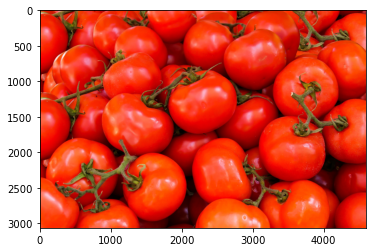

In [11]:
plt.imshow(imgs['red_item'])

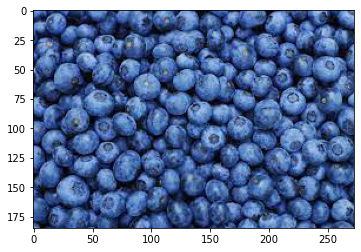

In [12]:
plt.imshow(imgs['blue_item'])

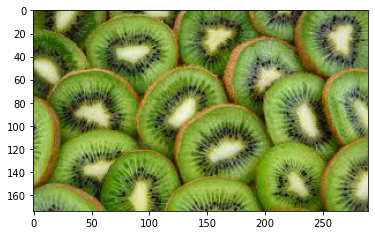

In [13]:
plt.imshow(imgs['green_item'])

In [14]:
# convert to torch tensors
for name, img in imgs.items():
    img = torch.from_numpy(img).float() # convert to float tensor
    img = img.permute(2, 0, 1) # (H, W, C) -> (C, H, W)
    imgs[name] = img

>   > * 
>   >   * For each image tensor, use the .mean() method to get a sense of how bright the image is.
>   >       * RGB 값이 높다면 흰색에 가깝기 때문에 내가 가져온 사진들중에 가장 밝은 사진은 키위 사진이다.

In [15]:
# print mean
for name, img in imgs.items():
    print(f'{name} mean: {torch.mean(img)}')

red_item mean: 91.90640258789062
blue_item mean: 97.85626220703125
green_item mean: 105.06676483154297


>   >   * Take the mean of each channel of your images. Can you identify the red, green, and blue items from only the channel averages?
>   >       * 아래에 각각 채널 순서대로 평균값을 구해보았다. 여기서 보았을 때에도, red item의 첫번째 R 채널의 평균이 가장 높다. (RGB 채널순), blue item은 세번째 채널 B 채널의 평균이 높으며, green item은 두번째 G 채널의 평균이 가장 높은 것을 확인할 수 있었다.

In [16]:
for name, img in imgs.items():
    for c in range(3):
        print(f'{name} mean: {torch.mean(img[c])}')
    print()

red_item mean: 207.13714599609375
red_item mean: 47.68098449707031
red_item mean: 20.90108299255371

blue_item mean: 62.74705505371094
blue_item mean: 89.96307373046875
blue_item mean: 140.85867309570312

green_item mean: 118.30608367919922
green_item mean: 136.77261352539062
green_item mean: 60.12160110473633



>   > * Select a relatively large file containing Python source code.
>   >   * Build an index of all the words in the source file (feel free to make your tokenization as simple or as complex as you like; we suggest starting with replacing r"[^a-zA-Z0-9_]+" with spaces).

In [17]:
import re

with open('./swin_transformer.py', encoding='utf8') as f:
    code = f.read()

def clean_words(input_str):
    word_list = re.sub(r"[^a-zA-Z0-9_]+", ' ', input_str.replace('\n', ' ')).split() # r"[^a-zA-Z0-9_]+" is a regular expression

    return word_list

word_list = sorted(set(clean_words(code)))
word2index_dict = {word: i for i, word in enumerate(word_list)}

len(word2index_dict), word2index_dict['SwinTransformer']

(435, 88)

>   > * 
>   >   * Compare your index with the one we made for *Pride and Prejudice* . Which is larger?
>   >       * 오만과 편견이 더 색인이 크다. (오만과 편견 7261, Swin transformer 코드 435) 아마도 코드 파일에서는 사용되는 단어가 정해져 있다 보니까 많은 차이가 난다.
>   >   * Create the one-hot encoding for the source code file.

In [18]:
word_t = torch.zeros(len(word_list), len(word2index_dict))
for i, word in enumerate(word_list):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print(f'{i:2} {word_index:4} {word}')

print(word_t.shape)
print(word_t[word2index_dict['SwinTransformer']])

 0    0 0
 1    1 02
 2    2 1
 3    3 100
 4    4 1000
 5    5 12
 6    6 14030
 7    7 2
 8    8 2021
 9    9 2103
10   10 224
11   11 24
12   12 3
13   13 4
14   14 5
15   15 6
16   16 7
17   17 96
18   18 A
19   19 Activation
20   20 AdaptiveAvgPool1d
21   21 Args
22   22 Attention
23   23 B
24   24 B_
25   25 BasicLayer
26   26 Block
27   27 C
28   28 Conv2d
29   29 Copyright
30   30 Default
31   31 Depth
32   32 Downsample
33   33 DropPath
34   34 Dropout
35   35 Embedding
36   36 FFN
37   37 FIXME
38   38 False
39   39 Fused
40   40 GELU
41   41 H
42   42 Height
43   43 Hierarchical
44   44 Ho
45   45 Identity
46   46 If
47   47 Image
48   48 Input
49   49 It
50   50 L
51   51 LICENSE
52   52 Layer
53   53 LayerNorm
54   54 License
55   55 Licensed
56   56 Linear
57   57 Liu
58   58 Local
59   59 MIT
60   60 MSA
61   61 Merging
62   62 Microsoft
63   63 Mlp
64   64 Module
65   65 ModuleList
66   66 N
67   67 None
68   68 Normalization
69   69 Number
70   70 Override
71   71 Para

>   > * 
>   >   * What information is lost with this encoding? How does that information compare to what's lost in the *Pride and Prejudice* encoding?
>   >       * 파이썬 코드의 문법적으로 중요한 정보들이 손실된다. 파이썬에서 어찌보면 가장 중요하다고 볼 수 있는 들여쓰기의 정보가 사라진다. 또한 현재 코드에서는 단어를 파싱하면서, 연산자를 걸러내기 때문에 프로그래밍적인 정보가 손실된다.